# **Activity 1: Analysing Customer Subscriptions to Term Deposits**

# **I. DATA PRE-PROCESSING**

# **1. Data Loading**

In the data loading section, I will begin by importing the necessary files and examining the structure of both the training and testing datasets. This includes checking key details such as the number of rows and columns, data types, and overall data completeness.

By understanding the dataset's format and structure, we can ensure it is ready for preprocessing and analysis in the subsequent steps.

**Import necessary file and library**

In [ ]:
#Import Module
import pandas as pd
import numpy as np
#Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**Training Data Summary**

In [ ]:
df_train.info()
df_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  object 
 2   marital         39188 non-null  object 
 3   education       39188 non-null  object 
 4   default         39188 non-null  object 
 5   housing         39188 non-null  object 
 6   loan            39188 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
1,33,technician,divorced,high.school,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,75,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
3,35,technician,married,professional.course,no,yes,yes,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
4,42,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
5,57,admin.,divorced,high.school,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
6,27,housemaid,married,high.school,no,yes,no,cellular,mar,fri,...,12,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,no
7,31,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
8,54,retired,married,high.school,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,26,admin.,single,high.school,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Testing Data Summary**

In [ ]:
df_test.info()
df_test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   job             2000 non-null   object 
 2   marital         2000 non-null   object 
 3   education       2000 non-null   object 
 4   default         2000 non-null   object 
 5   housing         2000 non-null   object 
 6   loan            2000 non-null   object 
 7   contact         2000 non-null   object 
 8   month           2000 non-null   object 
 9   day_of_week     2000 non-null   object 
 10  duration        2000 non-null   int64  
 11  campaign        2000 non-null   int64  
 12  pdays           2000 non-null   int64  
 13  previous        2000 non-null   int64  
 14  poutcome        2000 non-null   object 
 15  emp.var.rate    2000 non-null   float64
 16  cons.price.idx  2000 non-null   float64
 17  cons.conf.idx   2000 non-null   f

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,27,services,single,university.degree,no,yes,no,cellular,apr,thu,297,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1
1,31,self-employed,divorced,basic.9y,no,yes,no,cellular,may,fri,12,10,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
2,34,unemployed,married,basic.9y,no,yes,no,cellular,may,thu,218,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
3,49,admin.,divorced,high.school,no,no,no,telephone,may,thu,136,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4,29,admin.,married,unknown,no,unknown,unknown,telephone,jun,fri,83,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
5,43,technician,divorced,high.school,no,yes,yes,cellular,jul,mon,200,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
6,50,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,tue,307,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,30,student,single,high.school,no,yes,yes,cellular,apr,mon,102,3,10,1,success,-1.8,93.749,-34.6,0.645,5008.7
8,21,student,single,high.school,no,yes,yes,cellular,jun,wed,286,2,999,0,nonexistent,-1.7,94.055,-39.8,0.767,4991.6
9,31,admin.,married,university.degree,no,yes,no,cellular,aug,thu,95,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


**Insights**:


*   The training set has 39,188 entries with 21 columns, while the test set has 2,000 entries with 20 columns.
*   The main difference is the target variable y, which is present in the training set but absent in the test set.

*   Both datasets share similar features, with 10 numeric and 10 categorical columns.









# **2. Data Pre-processing**

In the data preprocessing stage, I will identify and handle any missing and duplicate values to ensure data quality. Additionally, I will save a cleaned version of the dataset specifically for visualization in Tableau.

Meanwhile, I will continue preprocessing by converting categorical variables to numeric values to facilitate model training and analysis.

**Check Duplicated Values**

In [ ]:
# Check for duplicated values
num_duplicates = df_train.duplicated().sum()
print(f'Number of duplicated values in train set before removal: {num_duplicates}')

num_duplicates = df_test.duplicated().sum()
print(f'Number of duplicated values in test set before removal: {num_duplicates}')

Number of duplicated values in train set before removal: 11
Number of duplicated values in test set before removal: 0


In [ ]:
# Check for duplicated values
num_duplicates = df_train.duplicated(keep=False).sum()  # keep=False to count all occurrences of duplicates
print(f'Number of duplicated values in train set before removal: {num_duplicates}')

# Display the duplicated rows
if num_duplicates > 0:
    duplicated_rows = df_train[df_train.duplicated(keep=False)]  # keep=False shows all duplicate instances
    # Sort the duplicated rows to make identical values stand together
    duplicated_rows_sorted = duplicated_rows.sort_values(by=df_train.columns.tolist())  # Sort by all columns to group identical rows
    print("\nDuplicated rows in train set (sorted to group identical values):")

    # Resetting index for easier visualization of original row indices
    duplicated_rows_sorted = duplicated_rows_sorted.reset_index()
    print(duplicated_rows_sorted)


Number of duplicated values in train set before removal: 22

Duplicated rows in train set (sorted to group identical values):
    index  age          job   marital            education  default housing  \
0      52   24     services    single          high.school       no     yes   
1   34805   24     services    single          high.school       no     yes   
2    9440   27   technician    single  professional.course       no      no   
3   32983   27   technician    single  professional.course       no      no   
4    9779   32   technician    single  professional.course       no     yes   
5   36716   32   technician    single  professional.course       no     yes   
6   11678   35       admin.   married    university.degree       no     yes   
7   13688   35       admin.   married    university.degree       no     yes   
8   11543   36      retired   married              unknown       no      no   
9   20109   36      retired   married              unknown       no      no   
10  3

**Insignts**: The training dataset contains 22 duplicate rows ( 11 duplicated values).

After removing these duplicates, I will recheck the dataset to ensure no duplicates remain.

In [ ]:
# Check any duplicated values
# Remove duplicated rows
df_train_cleaned = df_train.drop_duplicates()
df_test_cleaned = df_test.drop_duplicates()

# Recheck for duplicated values
num_duplicates_after = df_train_cleaned.duplicated().sum()
print(f'Number of duplicated values in train set after removal: {num_duplicates_after}')

num_duplicates_after = df_test_cleaned.duplicated().sum()
print(f'Number of duplicated values in test set after removal: {num_duplicates_after}')

Number of duplicated values in train set after removal: 0
Number of duplicated values in test set after removal: 0


**Check Missing Values in both Dataset**

In [ ]:
missing_values_train = df_train.isna().sum()
missing_values_test = df_test.isna().sum()

#Display missing value in train set
print(f'Number of missing values in each columns in train set:\n {missing_values_train}')

#Display missing value in test set
print(f'Number of missing values in each columns in test set:\n {missing_values_test}')

Number of missing values in each columns in train set:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Number of missing values in each columns in test set:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


**Insignts**: According to the results, there are no missing values in either the training or the test set.

**Saved Cleaned Train Dataset for Tableau visualization**

Next, I will save the cleaned training dataset to a new CSV file in Google Colab for visualization purposes, as I plan to handle character-to-numeric transformations later during model building.

In [ ]:
import pandas as pd
# Save the cleaned DataFrame to a CSV file
df_train_cleaned.to_csv('cleaned_train.csv', index=False)

**Target Variable Encoding**

In [ ]:
df_train['y'] = df_train['y'].map({'yes': 1, 'no': 0})
df_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,0
1,33,technician,divorced,high.school,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
2,75,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,1
3,35,technician,married,professional.course,no,yes,yes,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,0
4,42,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
5,57,admin.,divorced,high.school,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,27,housemaid,married,high.school,no,yes,no,cellular,mar,fri,...,12,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,0
7,31,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
8,54,retired,married,high.school,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,26,admin.,single,high.school,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


The "y" column has been converted to binary values "1" and "0," simplifying interpretation and making it easier for the model to process and learn from the data.

**Encoding Categorical Variables in Dataset**

Converts text-based categories into numeric codes, allowing the model to interpret and use categorical data effectively for training and predictions.

In [ ]:
#Define a function to transform categorical data into numeric values
def ConvertCategoricalData(df_train):
    for column in df_train.columns:
        #Check if any columns are categorical
        if df_train[column].dtype == 'object':
        #If the column data type is categorical, convert it to numeric
            df_train[column] = df_train[column].astype('category').cat.codes
    return df_train

#Apply the ConvertCategoricalData function to the dataset
df_train = ConvertCategoricalData(df_train)

#Check datastructure to ensure categorical data was converted successfully
print(df_train.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  int8   
 2   marital         39188 non-null  int8   
 3   education       39188 non-null  int8   
 4   default         39188 non-null  int8   
 5   housing         39188 non-null  int8   
 6   loan            39188 non-null  int8   
 7   contact         39188 non-null  int8   
 8   month           39188 non-null  int8   
 9   day_of_week     39188 non-null  int8   
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  int8   
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

In [ ]:
df_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,0,0,6,0,2,0,0,7,0,...,3,999,1,0,-0.1,93.200,-42.0,4.021,5195.8,0
1,33,9,0,3,0,0,0,0,7,3,...,1,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,75,5,0,0,1,2,0,0,8,2,...,1,999,0,1,-3.4,92.431,-26.9,0.754,5017.5,1
3,35,9,1,5,0,2,2,0,6,4,...,1,999,1,0,-1.8,92.893,-46.2,1.334,5099.1,0
4,42,0,0,6,0,2,0,0,1,1,...,5,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
5,57,0,0,3,1,2,0,0,3,3,...,1,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0
6,27,3,1,3,0,2,0,0,5,0,...,12,999,0,1,-1.8,92.843,-50.0,1.531,5099.1,0
7,31,0,2,3,0,2,0,0,7,4,...,3,999,0,1,-0.1,93.200,-42.0,4.120,5195.8,0
8,54,5,1,3,0,2,0,1,6,3,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,26,0,2,3,0,0,0,1,6,4,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


**Verifying Encoded Mappings for Categorical Variables**

This code ensures consistent mappings for future transformations on the test set. By keeping the mappings, I ensure that the test data can be transformed using the same codes, maintaining consistency across both datasets for accurate model predictions.

In [ ]:
import pandas as pd

# Load the cleaned dataset (assuming it's already saved in a CSV)
df_train_cleaned = pd.read_csv('cleaned_train.csv')

# Function to extract categorical data
def extract_categorical_data(df):
    return df.select_dtypes(include=['object'])

# Extract categorical data from the cleaned dataset
categorical_cleaned = extract_categorical_data(df_train_cleaned)

# Print the original categorical values for comparison
print("Categorical Data from Cleaned Set:")
print(categorical_cleaned.head(10))

# Define a function to transform categorical data into numeric values and keep track of mappings
def ConvertCategoricalDataWithMapping(df):
    mappings = {}  # Dictionary to store mappings for each column
    for column in df.columns:
        if df[column].dtype == 'object':
            # Create a mapping before converting
            unique_values = df[column].unique()
            mappings[column] = {value: i for i, value in enumerate(unique_values)}
            # Convert to category and then to codes
            df[column] = df[column].astype('category').cat.codes
    return df, mappings

# Apply the ConvertCategoricalData function to the dataset
df_train, train_mappings = ConvertCategoricalDataWithMapping(df_train_cleaned)

# Print the mappings for verification
print("\nMappings for Transformed Categorical Data:")
for column, mapping in train_mappings.items():
    print(f"Mappings for column '{column}':")
    for category, code in mapping.items():
        print(f"  {category}: {code}")
    print()  # Add a new line for better separation between columns

# Optionally, print the transformed DataFrame to see the results
print("Transformed DataFrame:")
print(df_train.head(10))

Categorical Data from Cleaned Set:
          job   marital            education  default housing loan    contact  \
0      admin.  divorced    university.degree       no     yes   no   cellular   
1  technician  divorced          high.school       no      no   no   cellular   
2     retired  divorced             basic.4y  unknown     yes   no   cellular   
3  technician   married  professional.course       no     yes  yes   cellular   
4      admin.  divorced    university.degree       no     yes   no   cellular   
5      admin.  divorced          high.school  unknown     yes   no   cellular   
6   housemaid   married          high.school       no     yes   no   cellular   
7      admin.    single          high.school       no     yes   no   cellular   
8     retired   married          high.school       no     yes   no  telephone   
9      admin.    single          high.school       no      no   no  telephone   

  month day_of_week     poutcome    y  
0   nov         fri      failure 

# **II. DATA EXPLORATION (EDA)**

**Most data exploration and pattern identification will be conducted in Tableau**.

Here, I will highlight only the essential elements needed in Google Colab to support model building.

**Descriptive Statistics Summary for Training Set**

In [ ]:
# Descriptive Statistics for training set
print("Descriptive Statistics for Training Set:")
print(df_train.describe())

Descriptive Statistics for Training Set:
                age           job       marital     education       default  \
count  39177.000000  39177.000000  39177.000000  39177.000000  39177.000000   
mean      40.014549      3.732700      1.173342      3.744799      0.209434   
std       10.424003      3.596495      0.609130      2.137052      0.407098   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      0.000000      1.000000      2.000000      0.000000   
50%       38.000000      2.000000      1.000000      3.000000      0.000000   
75%       47.000000      7.000000      2.000000      6.000000      0.000000   
max       98.000000     11.000000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  39177.000000  39177.000000  39177.000000  39177.000000  39177.000000   
mean       1.072568      0.327948      0.365495      4.228144      2.003089   
std       

**Insignts**: The training dataset contains 39,177 complete entries with no missing values. Key statistics show an average age of 40, with most 'campaign' values between 1 and 3, and 'age' ranging from 17 to 98. The target variable 'y' is imbalanced, with a low positive outcome rate (mean of 0.113), indicating fewer instances of the target class.

**Box Plot Visualization of All Dataset Columns**

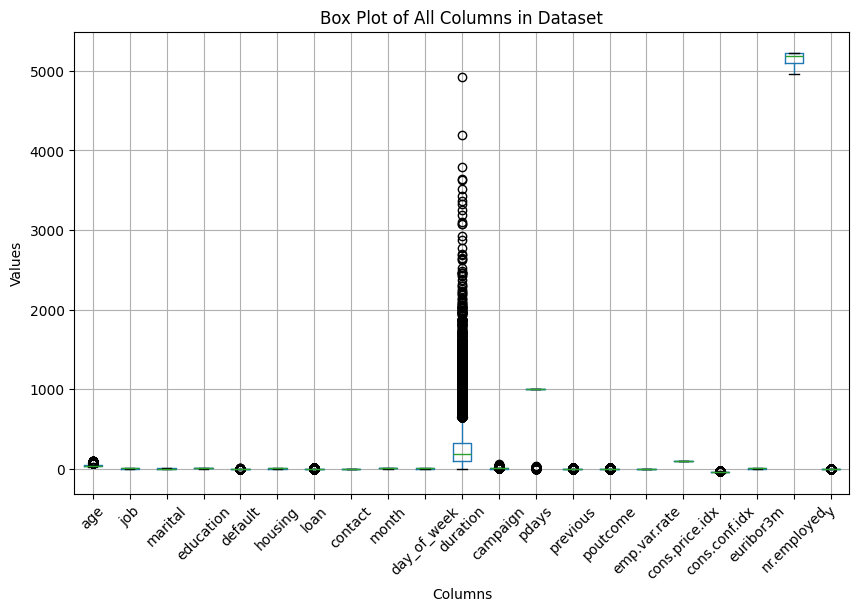

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Select the columns to plot
columns_to_plot = df_train.columns

# Create the box plot
plt.figure(figsize=(10, 6))
df_train[columns_to_plot].boxplot()
plt.title('Box Plot of All Columns in Dataset')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Insignts**: According to the chart, the duration column has a high concentration of outliers with a wide range of values, while nr.employed has consistently high values. Most other columns have compressed ranges, indicating less variability and fewer outliers.

Due to the high dimensionality, we could consider using a log transformation to reduce the range of values in the 'duration' column. However, since our model will be used to predict 'y' values in the test.csv file, I suggest preserving the original scale of all columns to maintain their natural characteristics.

# **III. ANALYSIS OF MACHINE LEARNING MODELS**

As identified earlier, this is a classification problem, as the target variable 'y' contains only two values, 'Yes' or 'No,' indicating whether a customer subscribed to a term deposit. Based on this, I will build and evaluate four models: Logistic Regression, Decision Tree Classifier, Random Forest, and Neural Network Classifier.

After training and evaluating these models, I will select the best-performing model to predict the target variable in the test set and perform Model Explainability using SHAP framework.

# **1. Preparing Data Split for Model Building**

**Separating Features and Target Variable for Model Training**

In [ ]:
# Assuming df_train is your training DataFrame
X = df_train.drop(columns=['y'])  # Replace 'y' with your actual target column name
Y = df_train['y']  # This is your target variable

This dataset contains 39188 data points. Therefore, I will select data split as train/validation as 70/30. In addition, I will not use test data split, as it lacks the target variable and is intended solely for prediction purposes.

**Class Distribution of Target Variable 'y'**

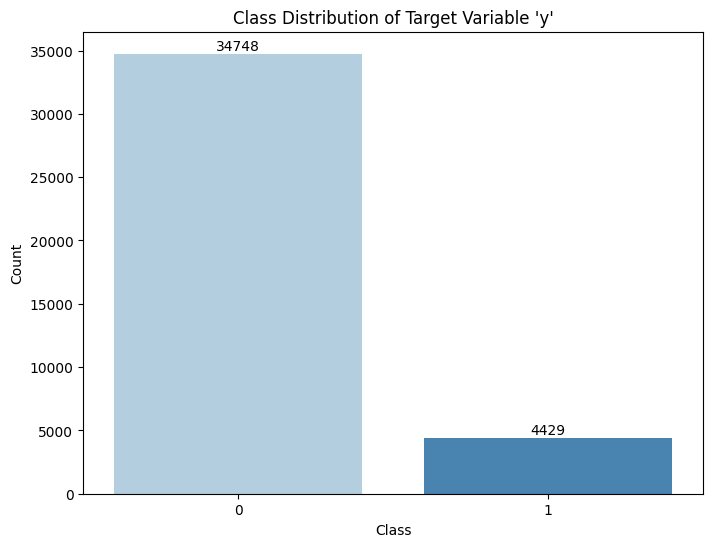

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the value counts of 'y' as a bar chart using seaborn with a custom color palette
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='y', data=df_train, hue='y', palette="Blues", legend=False)

plt.title("Class Distribution of Target Variable 'y'")
plt.xlabel("Class")
plt.ylabel("Count")

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insignts**: The target variable y has 34,748 instances of 0 and 4,429 of 1, showing a class imbalance.

**Data Split for Training and Validation (70/30)**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the shapes of the training and validation sets
print('Train Shape (rows, columns):', X_train.shape)
print('Validation Shape (rows, columns):', X_validation.shape)

Train Shape (rows, columns): (27423, 20)
Validation Shape (rows, columns): (11754, 20)


# **2. Implementing Four Classification Models for Evaluation**

# **LOGISTICS REGRESSION CLASSIFICATION MODEL**

**Justification for choosing this model**:
Logistic regression is a simple and interpretable model for binary classification, providing probability estimates for Term Deposit. It is efficient and works well with linearly separable data.

**Fine-Tuning Logistic Regression Model with Grid Search**

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# # Define the parameter grid for Grid Search
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
#     'solver': ['liblinear', 'lbfgs', 'saga'],  # Different solvers available
#     'max_iter': [100, 200, 300]  # Maximum number of iterations
# }

# # Initialize the Logistic Regression model
# log_reg_model = LogisticRegression(random_state=0)

# # Set up Grid Search with cross-validation
# grid_search = GridSearchCV(
#     estimator=log_reg_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Verbose output to track progress
# )

# # Fit Grid Search on the training data
# grid_search.fit(X_train, Y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters from Grid Search:", best_params)
# print("Best Score from Grid Search:", best_score)

The results of this Grid Search are as follows:

    Fitting 5 folds for each of 45 candidates, totalling 225 fits
    Best Parameters from Grid Search: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
    Best Score from Grid Search: 0.9090443849616111

Due to the long processing time, I will comment out (##) the previous code for your review.

**Performing Logistic Regression Classification Model and Evaluating Results**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model with specified parameters
model = LogisticRegression(C=0.01, max_iter=100, solver='liblinear')

# Fit the model to the training data
model.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = model.predict(X_train)
# Validation accuracy
Y_val_predict = model.predict(X_validation)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics for validation set
val_accuracy = accuracy_score(Y_validation, Y_val_predict)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(Y_validation, Y_val_predict))


Validation Metrics:
Accuracy: 0.9095

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10459
           1       0.65      0.39      0.48      1295

    accuracy                           0.91     11754
   macro avg       0.79      0.68      0.72     11754
weighted avg       0.90      0.91      0.90     11754



# **DECISION TREE CLASSIFICATION MODEL**

**Justification for choosing this model**: Decision trees are intuitive and easy to interpret, effectively capturing non-linear relationships in data. They handle both numerical and categorical features with minimal preprocessing, making them versatile for various classification tasks.

**Fine-Tuning Decision Tree Model with Grid Search**

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# # Define the parameter grid for Grid Search
# param_grid = {
#     'criterion': ['gini', 'entropy'],  # Measure to evaluate splits
#     'max_depth': [None, 5, 10, 15,20,25,30],  # Limited range for depth
#     'min_samples_leaf': [1, 5, 10],  # Fewer options for minimum samples at leaf
#     'min_samples_split': [2, 5, 10]   # Fewer options for minimum samples to split
# }

# # Initialize the Decision Tree Classifier
# treeLearner = DecisionTreeClassifier(random_state=0)

# # Set up Grid Search with cross-validation
# grid_search = GridSearchCV(
#     estimator=treeLearner,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Verbose output to track progress
# )

# # Fit Grid Search on the training data
# grid_search.fit(X_train, Y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters from Grid Search:", best_params)
# print("Best Score from Grid Search:", best_score)

The results of GridSearch best parameter is:

    Fitting 5 folds for each of 126 candidates, totaling 630 fits.
    Best Parameters from Grid Search: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
    Best Score from Grid Search: 0.9126169693773258.

Due to the long processing time, I will comment out the previous code for your review.

**Performing Decision Tree Classification Model and Evaluating Results**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
# Train the Decision Tree model with the best parameters
best_tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=2)
best_tree_model.fit(X_train, Y_train)

# Make predictions on the validation set
y_val_pred = best_tree_model.predict(X_validation)

# Cross-validate the model
evalResults_treeLearner = cross_validate(best_tree_model,
                                         X=X_train,
                                         y=Y_train,
                                         cv=5,
                                         scoring=['accuracy', 'roc_auc'])


print("\nEvaluate Decision Tree:")
print("Mean accuracy (cross-validated): {:.4f}".format(evalResults_treeLearner['test_accuracy'].mean()))
print("Mean ROC AUC (cross-validated): {:.4f}".format(evalResults_treeLearner['test_roc_auc'].mean()))

# Print classification report on validation set
print("\nClassification Report:\n")
print(classification_report(Y_validation, y_val_pred))


Evaluate Decision Tree:
Mean accuracy (cross-validated): 0.9128
Mean ROC AUC (cross-validated): 0.9282

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10459
           1       0.67      0.48      0.56      1295

    accuracy                           0.92     11754
   macro avg       0.80      0.72      0.76     11754
weighted avg       0.91      0.92      0.91     11754



# **Neural Network Classification**

**Justification for choosing this model**: Neural networks are effective for classification tasks due to their ability to learn complex, non-linear patterns in high-dimensional data. Their flexible architecture allows for state-of-the-art performance across various applications, including image and text classification.

**Fine-Tuning Neural Network Model with Grid Search**

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# # Define the parameter grid for Grid Search
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],  # Different configurations of hidden layers
#     'activation': ['logistic', 'tanh', 'relu'],  # Activation functions
#     'solver': ['lbfgs', 'adam'],  # Solvers (removed 'sgd' for efficiency)
#     'alpha': [0.0001, 0.001, 0.01],  # Fixed values for regularization strength
#     'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies (removed 'invscaling' for efficiency)
#     'max_iter': [100, 200, 300]  # Fixed number of iterations
# }

# # Initialize the MLPClassifier
# mlp_model = MLPClassifier(random_state=0)

# # Set up Grid Search with cross-validation
# grid_search = GridSearchCV(
#     estimator=mlp_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Verbose output to track progress
# )

# # Fit Grid Search on the training data
# grid_search.fit(X_train, Y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters from Grid Search:", best_params)
# print("Best Score from Grid Search:", best_score)

The results of the Grid Search best parameters are:

    Fitting 5 folds for each of 432 candidates, totalling 2160 fits
    Best Parameters from Grid Search: {'hidden_layer_sizes': (100,), 'activation': relu, 'solver': adam, alpha=0.0001, learning_rate='adaptive', max_iter=200,}
    Best Score from Grid Search: 0.9056732159564514.

Due to the long processing time, I will comment out the previous code for your review.

**Performing Neural Network Classification Model and Evaluating Results**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Fixed parameters for MLPClassifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=200,
    random_state=0
)

# Fit the model on the training data
mlp_model.fit(X_train, Y_train)

# Make predictions on the validation set
Y_val_predict = mlp_model.predict(X_validation)

# Calculate accuracy for validation set
val_accuracy = accuracy_score(Y_validation, Y_val_predict)

# Print validation metrics
print("\nValidation Metrics with Fixed Parameters:")
print(f"Accuracy: {val_accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report with Fixed Parameters:\n", classification_report(Y_validation, Y_val_predict))


Validation Metrics with Fixed Parameters:
Accuracy: 0.9046

Classification Report with Fixed Parameters:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10459
           1       0.64      0.31      0.41      1295

    accuracy                           0.90     11754
   macro avg       0.78      0.64      0.68     11754
weighted avg       0.89      0.90      0.89     11754



# **RANDOM FOREST MODEL**

**Justification for choosing this model**: Random Forest is an ensemble learning method that improves predictive accuracy by combining multiple decision trees, making it robust against overfitting.

**Fine-Tuning Random Forest Model with Grid Search**

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# # Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [100, 200],  # Reduced for efficiency
#     'max_depth': [None, 10, 20],  # Limited depth options
#     'min_samples_leaf': [1, 5],  # Fewer options for leaf samples
#     'min_samples_split': [2, 5]    # Fewer options for split samples
# }

# # Initialize the Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=0)

# # Set up Grid Search with cross-validation
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Verbose output to track progress
# )

# # Fit Grid Search on the training data
# grid_search.fit(X_train, Y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters from Grid Search:", best_params)
# print("Best Score from Grid Search:", best_score)

The results of GridSearch best parameter is:

    Fitting 5 folds for each of 24 candidates, totalling 120 fits
    Best Parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
    Best Score from Grid Search: 0.9162625065270438

Due to the long processing time, I will comment out the previous code for your review.

**Performing Random Forest Classification Model and Evaluating Results**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=2,
    n_estimators=200
)
best_rf_model.fit(X_train, Y_train)

# Make predictions on the validation set
Y_val_predict = best_rf_model.predict(X_validation)

# Calculate accuracy for validation set
val_accuracy = accuracy_score(Y_validation, Y_val_predict)

# Print validation metrics
print("\nValidation Metrics with Best Parameters:")
print(f"Accuracy: {val_accuracy:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report with Best Parameters:\n", classification_report(Y_validation, Y_val_predict))


Validation Metrics with Best Parameters:
Accuracy: 0.9193

Classification Report with Best Parameters:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     10459
           1       0.68      0.51      0.58      1295

    accuracy                           0.92     11754
   macro avg       0.81      0.74      0.77     11754
weighted avg       0.91      0.92      0.91     11754



# **3. Comparative Analysis of All Models Performance Metrics**

                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression  0.909478   0.650587  0.385328  0.483996   
1        Decision Tree  0.916369   0.668467  0.477992  0.557407   
2       Neural Network  0.904628   0.641234  0.305019  0.413396   
3        Random Forest  0.919347   0.676860  0.512741  0.583480   

                  Confusion Matrix  
0  [[10191   268]\n [  796   499]]  
1  [[10152   307]\n [  676   619]]  
2  [[10238   221]\n [  900   395]]  
3  [[10142   317]\n [  631   664]]  


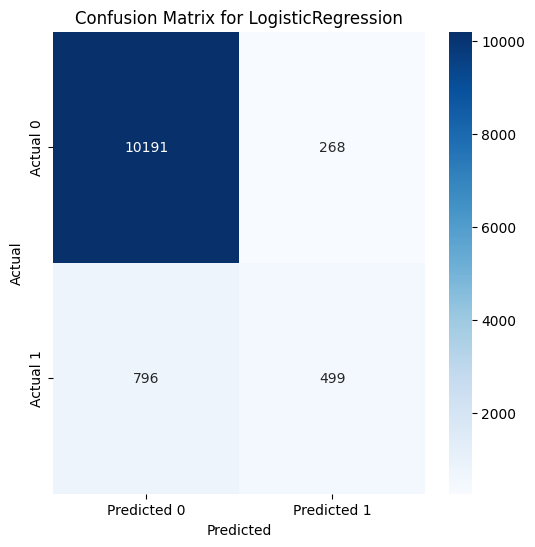

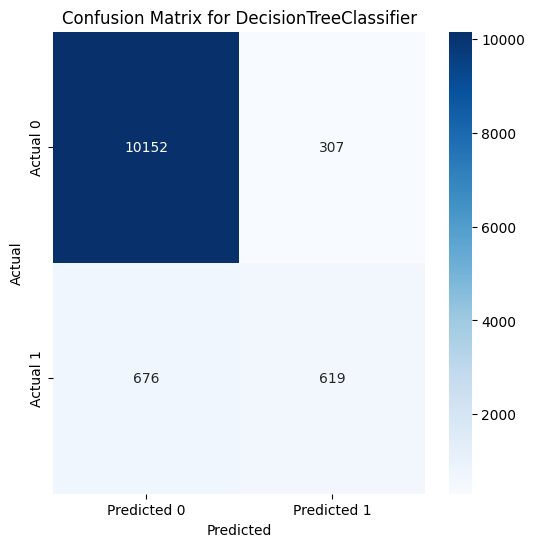

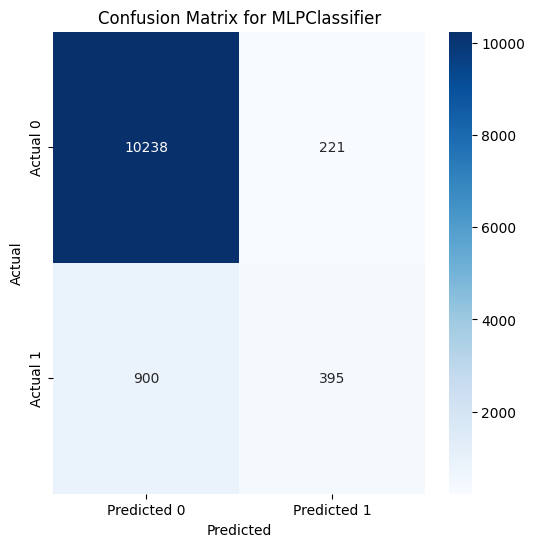

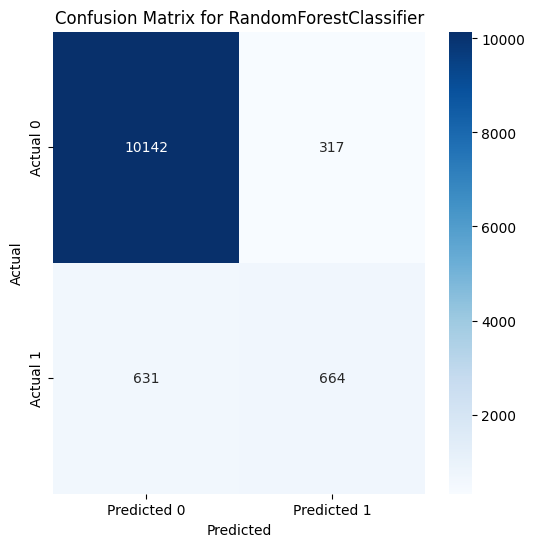

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Function to create the evaluation data grid
def create_evaluation_datagrid(models, X_validation, Y_validation):
    """
    Creates a Pandas DataFrame to display model evaluation metrics, including confusion matrices.

    Args:
        models: A dictionary where keys are model names and values are trained model objects.
        X_validation: The validation features.
        Y_validation: The validation labels.

    Returns:
        A Pandas DataFrame containing the evaluation metrics.
    """
    data = []
    for model_name, model in models.items():
        y_pred = model.predict(X_validation)

        accuracy = accuracy_score(Y_validation, y_pred)
        precision = precision_score(Y_validation, y_pred, zero_division=0)  # Handle potential division by zero
        recall = recall_score(Y_validation, y_pred, zero_division=0)  # Handle potential division by zero
        f1 = f1_score(Y_validation, y_pred, zero_division=0)  # Handle potential division by zero

        cm = confusion_matrix(Y_validation, y_pred)
        cm_str = str(cm)

        data.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Confusion Matrix": cm_str
        })

    evaluation_df = pd.DataFrame(data)
    return evaluation_df

# Define models for evaluation
models = {
    "Logistic Regression": model,
    "Decision Tree": best_tree_model,
    "Neural Network": mlp_model,
    "Random Forest": best_rf_model
}

# Create the evaluation data grid
evaluation_datagrid = create_evaluation_datagrid(models, X_validation, Y_validation)
print(evaluation_datagrid)

# To display the confusion matrix as a heatmap
def plot_confusion_matrix(model, X_validation, Y_validation):
    y_pred = model.predict(X_validation)
    cm = confusion_matrix(Y_validation, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Visualize confusion matrices for all models
for model_name, model in models.items():
    plot_confusion_matrix(model, X_validation, Y_validation)


**Insignts**: Random Forest emerges as the best model for predicting customer subscriptions, achieving an accuracy of 91.68% and demonstrating a balanced performance with a precision of 66.14% and a recall of 51.11%. Although its recall is moderate, indicating some missed subscriptions, it effectively minimizes false positives, crucial in contexts where accurately identifying potential subscribers is vital. This reduces the risk of targeting uninterested customers, which can waste resources and negatively impact customer relationships.

Moreover, the Decision Tree model also proves to be a good option for predicting customer subscriptions, with an accuracy of 91.36%, a precision of 64.87%, and a recall of 48.04%. While slightly lower in performance compared to Random Forest, its metrics indicate that it can still effectively identify potential subscribers, making it a valuable alternative for businesses looking to enhance their subscription strategies.

# **4. Predicting Class Labels on Test Set Using the Best Model (Random Forest)**

In this section, I will use the Random Forest model, which has shown to deliver the highest accuracy, to perform data prediction.

In [ ]:
df_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,27,services,single,university.degree,no,yes,no,cellular,apr,thu,297,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1
1,31,self-employed,divorced,basic.9y,no,yes,no,cellular,may,fri,12,10,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
2,34,unemployed,married,basic.9y,no,yes,no,cellular,may,thu,218,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
3,49,admin.,divorced,high.school,no,no,no,telephone,may,thu,136,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4,29,admin.,married,unknown,no,unknown,unknown,telephone,jun,fri,83,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
5,43,technician,divorced,high.school,no,yes,yes,cellular,jul,mon,200,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
6,50,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,tue,307,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,30,student,single,high.school,no,yes,yes,cellular,apr,mon,102,3,10,1,success,-1.8,93.749,-34.6,0.645,5008.7
8,21,student,single,high.school,no,yes,yes,cellular,jun,wed,286,2,999,0,nonexistent,-1.7,94.055,-39.8,0.767,4991.6
9,31,admin.,married,university.degree,no,yes,no,cellular,aug,thu,95,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


**Define Mappings for Categorical Data**

Converts categorical values to numeric codes to ensure consistent encoding across training and test datasets, enabling the model to interpret features correctly.

In [ ]:
import pandas as pd

# Define the mappings based on your previous output
mappings = {
    'job': {
        'admin.': 0, 'technician': 1, 'retired': 2, 'housemaid': 3,
        'blue-collar': 4, 'student': 5, 'self-employed': 6,
        'services': 7, 'entrepreneur': 8, 'management': 9,
        'unemployed': 10, 'unknown': 11
    },
    'marital': {
        'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3
    },
    'education': {
        'university.degree': 0, 'high.school': 1, 'basic.4y': 2,
        'professional.course': 3, 'basic.9y': 4, 'unknown': 5,
        'basic.6y': 6, 'illiterate': 7
    },
    'default': {
        'no': 0, 'unknown': 1, 'yes': 2
    },
    'housing': {
        'yes': 0, 'no': 1, 'unknown': 2
    },
    'loan': {
        'no': 0, 'yes': 1, 'unknown': 2
    },
    'contact': {
        'cellular': 0, 'telephone': 1
    },
    'month': {
        'nov': 0, 'oct': 1, 'may': 2, 'aug': 3,
        'jul': 4, 'mar': 5, 'jun': 6, 'apr': 7,
        'sep': 8, 'dec': 9
    },
    'day_of_week': {
        'fri': 0, 'tue': 1, 'thu': 2, 'wed': 3, 'mon': 4
    },
    'poutcome': {
        'failure': 0, 'nonexistent': 1, 'success': 2
    }
}

# Function to transform test data using the saved mappings
def TransformTestData(df, mappings):
    for column in df.columns:
        if column in mappings:
            # Map the categorical values to their corresponding numeric codes
            df[column] = df[column].map(mappings[column])
    return df

**Making Predictions & Save Predictions to CSV Files**

Uses the trained models (Random Forest and Decision Tree) to predict outcomes on the test set and maps numeric predictions back to "yes" or "no" for readability.

Creates and saves separate files for each model’s predictions, facilitating easy comparison and review.

Random Forest Classification Prediction

In [ ]:
# Apply the TransformTestData function to the test dataset
df_test_transformed = TransformTestData(df_test, mappings)

# Ensure the test data has the same columns as the training data
X_test = df_test_transformed  # Directly use the transformed test data

# Make predictions on the test dataset using the trained Random Forest model
test_predictions = best_rf_model.predict(X_test)

# Map predictions back to Yes/No
test_predictions_mapped = ['yes' if pred == 1 else 'no' for pred in test_predictions]

# Create a final DataFrame with only 'Predicted y' and 'id' starting from 0
final_df = pd.DataFrame({
    'id': range(len(test_predictions)),  # Create an ID column starting from 0
    'Predicted y': test_predictions_mapped  # Add predictions
})

# Save the final DataFrame to a new CSV file
final_df.to_csv('final_predictions_byRandomForest.csv', index=False)

print("Final predictions file with 'id' starting from 0 and 'Predicted y' has been saved.")

Final predictions file with 'id' starting from 0 and 'Predicted y' has been saved.


**IV. MODEL EXPLAINABILITY**

**SHAP (SHapley Additive exPlanations)** is a game-theoretic approach that explains model predictions by attributing each feature's contribution. Here, I will use SHAP with the Random Forest Classifier to interpret feature influences on predictions.

**Sampling Dataset and Training Random Forest Model for SHAP Analysis**

In general, I prepare a subset of the dataset to train and evaluate a Random Forest model for SHAP analysis. By sampling 10% of the data, I reduce computational load, making it feasible to compute SHAP values.

Once verified, I will comment out the subset code and run SHAP on the full dataset with the real model, which may take around an hour to complete. Moreover,  I’ll keep the subset code below for your review.

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import shap

# # Sample 10% of the dataset
# sampled_df = df_train_cleaned.sample(frac=0.1, random_state=42)  # Adjusted to 10%

# # Define features (X) and target (y)
# X = sampled_df.drop(columns=['y'])
# y = sampled_df['y'].to_numpy()

# # Split the dataset into 70% training and 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Verify the shapes
# print("Training set shape:", X_train.shape, y_train.shape)
# print("Testing set shape:", X_test.shape, y_test.shape)

# # Train the Random Forest model
# model = best_rf_model.fit(X_train, y_train)
# print(model)

**Defining Features, Target, and Training the best Random Forest Model**

The **best_rf_model** refers to the Random Forest model that I fine-tuned earlier through hyperparameter tuning, selecting the optimal parameters for maximum accuracy. This model is now trained on the full dataset to ensure the best possible performance for predictions and SHAP analysis.

In [ ]:
X = df_train.drop(columns=['y'])
y = df_train['y'].to_numpy()

model = best_rf_model.fit(X_train, Y_train)

**Installing SHAP for Model Interpretability**

In [ ]:
pip install shap

**Interpreting Model Predictions with SHAP Waterfall Plot**

This code uses SHAP to explain feature contributions in the model's predictions, visualizing the impact of each feature on the first prediction with a waterfall plot.

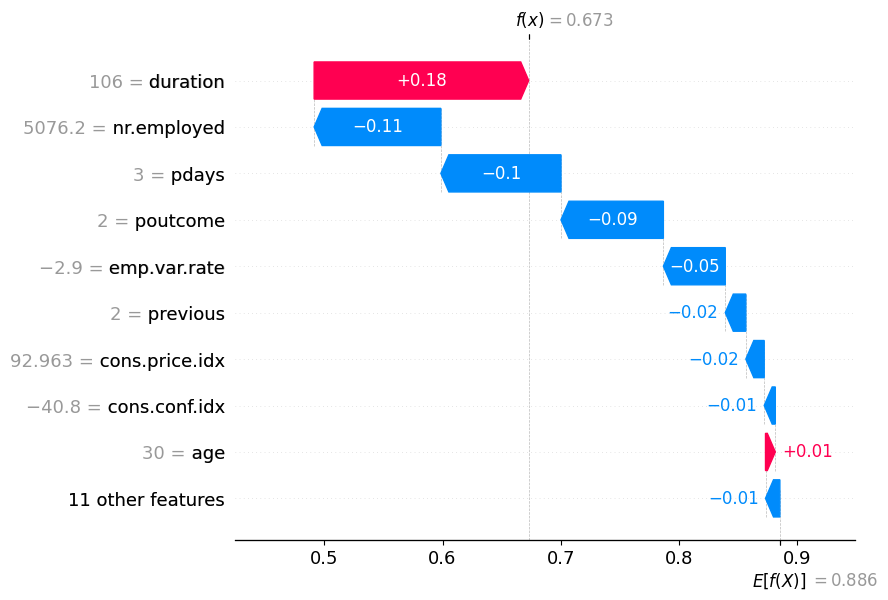

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0][:, 0])

**Insignts**:
This SHAP waterfall chart shows how each factor impacts the model’s prediction, starting from a baseline of 0.885. Using a Random Forest model, the prediction adjusts down to 0.68 after accounting for each feature.


* The top 3 influential factors are "Duration" (+0.18), "Pdays" (-0.11), and "Number of Employees" (-0.11). "Duration" increases the prediction significantly, while "Pdays" and "Number of Employees" lower it, suggesting fewer contact days and a smaller workforce decrease the predicted outcome.
* The least influential factors are "Consumer Price Index," "Age," and "Month," each with minimal impact, indicating the model relies more on other key features for this prediction.







**Visualizing SHAP Force Plot for Feature Impact**

This code initializes SHAP's JavaScript visualizations and generates a force plot to display feature contributions for the first prediction, highlighting how each feature pushes the prediction higher or lower.

In [ ]:
import shap
shap.initjs()
shap.plots.force(shap_values[0][:, 0])

**Insignts**: SHAP force plot illustrates how various factors influence the prediction of a machine learning model. By breaking down the contributions of each feature, we gain insights into the key drivers of the predicted outcom:


*   Top Positive Factor: Duration (106) increases prediction, suggesting longer interactions are beneficial.
*   Top Negative Factors: Pdays (3) and Number of Employees (5,076) decrease prediction, indicating fewer previous contacts and a smaller workforce lower the outcome likelihood.
*   Minor Negative Influences: Other factors make small adjustments, slightly lowering the prediction.

In summary, the primary positive impact comes from the "Duration" of interactions, while "Pdays" and "Number of Employees" are significant negative influences. Understanding these dynamics helps us refine strategies to enhance the prediction's accuracy and effectiveness.







**Force Plot for Visualizing All Training Set Predictions**

This code generates a SHAP force plot to display feature impacts across all training set predictions, showing how each feature contributes to the model’s output distribution.

In [ ]:
import shap
shap.initjs()
# visualize all the training set predictions
shap.plots.force(explainer.expected_value[0], shap_values.values[-500:, :, 0])

**Insight**: The SHAP force plot displays the distribution of model predictions, with predicted values (f(x)) ranging from approximately 0.2854 to 1.085.

This plot is helpful when we want to understand an individual prediction—why the model made a specific decision for a particular customer.
It shows how each feature either pushed the prediction up (toward a positive outcome) or down (toward a negative outcome) and by how much.
For example, we can look at one customer’s prediction and see that factors like "Duration" or "Previous Engagement" were key reasons for a positive prediction. This is valuable for customer-level insights and helps us see which factors led to specific decisions.


Overall, the plot reveals that the majority of instances experience a downward pull on their predictions due to the cumulative effects of the contributing features.

**Generating SHAP Dependence Plot for 'Duration' Feature**

This plot gives us a big-picture view of the most influential factors in the model. Each row represents a feature (e.g., "Duration" or "Employment Rate"), and the color-coded dots show how different values of each feature affect predictions.

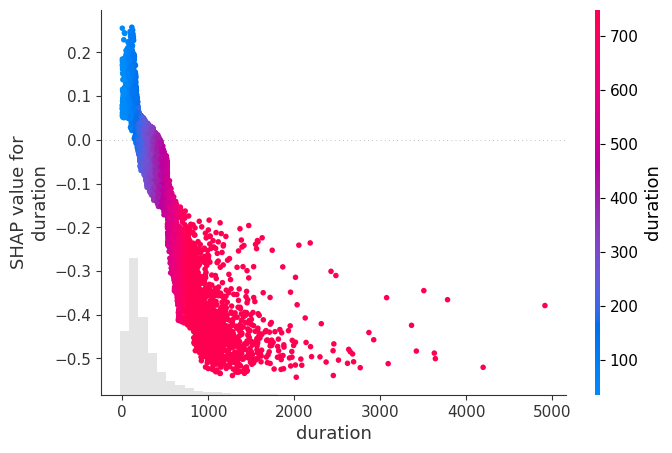

In [ ]:
duration_index = X_train.columns.get_loc("duration")  # Use get_loc to find column index
# Select SHAP values for the 'duration' feature and the first output class/background (index 0)
shap.plots.scatter(shap_values[:, duration_index, 0], color=shap_values[:, duration_index,0])

**Insight:** This SHAP dependence scatter plot illustrates how "Duration" affects model predictions. For instance, looking at "Duration," we might see that as duration increases, the likelihood of a positive decision (like a purchase or subscription) increases as well.
This helps us understand the direct effect of a single factor on customer decisions, giving us actionable insights into how specific changes (like encouraging longer engagements) could impact outcomes.



**Generating SHAP Beeswarm Plot for Feature Importance Visualization**

This plot displays the influence of each feature on the model’s predictions across all instances in the dataset.

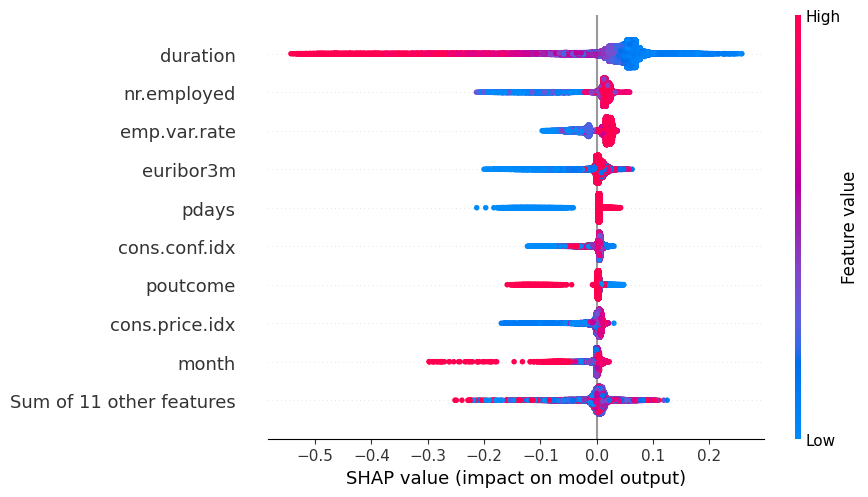

In [ ]:
shap.plots.beeswarm(shap_values[:, :, 0])

**Insights:** This SHAP beeswarm plot highlights "Duration" as the most influential feature, with higher values strongly pushing predictions toward the positive class. Other important features include "nr.employed" and "emp.var.rate," where lower values generally decrease prediction probability. Same with other SHAP charts, This chart reveals how different feature values impact model output, emphasizing "Duration" as the primary driver.


**Feature Importance Bar Plot**

In this case, we focus on class 0 because it has a higher percentage of instances in the dataset compared to class 1, indicating it’s the majority class. By analyzing SHAP values for class 0, we can understand what drives the model to predict this more common outcome.

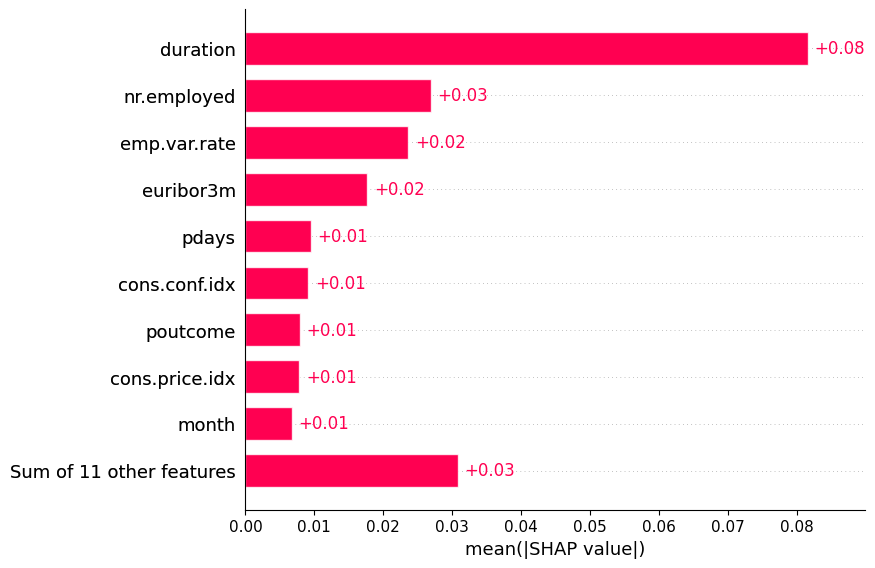

In [ ]:
# Select SHAP values for the first class
shap_values_class0 = shap_values[:, :, 0]

# Create the bar plot for the selected class
shap.plots.bar(shap_values_class0)

**Insights:** This SHAP feature importance bar chart shows the average impact of each feature on the model's predictions, helping us identify the most influential factors:


*   "Duration": By far the most important feature, with an average SHAP value of +0.08, indicating that it has a strong influence on predictions. Higher durations tend to increase the likelihood of a positive outcome.
*   "nr.employed": The second most influential feature, with a SHAP value of +0.03. This suggests that employment numbers moderately affect predictions, likely indicating customer engagement or economic stability.
*   "emp.var.rate" and "euribor3m": Both have average SHAP values around +0.02, showing that economic indicators also contribute to predictions, although less than "Duration" or "nr.employed."
*   Other Features: Variables like "pdays," "cons.conf.idx," and "month" have smaller SHAP values (~+0.01), meaning they influence predictions but to a lesser extent

Overall, this bar chart provides a clear ranking of features based on their importance, highlighting which factors most drive the model’s decisions. This information helps prioritize key variables that impact customer decisions or outcomes.

# **Summary of Insights and Recommendations**

**Key Insights from SHAP Analysis:**
*   Duration: The duration of customer engagement (e.g., call duration) is the most influential factor. Longer engagement correlates with a higher probability of signing up for a term deposit.
*   Employment Levels: Higher employment numbers (nr.employed) positively impact the likelihood of a term deposit, suggesting that economically stable customers may be more likely to invest.
*   Economic Indicators: Factors like "emp.var.rate" (employment variation rate) and "euribor3m" (interest rate) also influence decisions. Positive economic conditions seem to make customers more open to long-term financial commitments.

**Marketing Strategy Recommendations**

**1. Focus on Prolonged Engagement**
*   Customer Interaction: Train sales representatives to engage customers in longer, meaningful conversations that address customer needs, concerns, and financial goals.
*   Educational Content: Provide informative content that takes time to explain the benefits of term deposits, helping customers feel informed and invested in the decision-making process.

**2. Target Economically Stable Segments**
*   Customer Profiling: Identify customers with stable employment and income levels as they show a higher probability of signing up for term deposits.
*   Personalized Offers: For employed customers, promote the security and reliability of term deposits as a safe way to grow their savings over time.

**3. Leverage Positive Economic Sentiment**
*   Campaign Timing: Run campaigns or increase outreach during times of positive economic indicators, such as low interest rates or high employment rates, when customers may be more receptive to financial investments.
*   Highlight Security: Emphasize the stability of term deposits in uncertain markets. Use economic trends in your messaging to appeal to customers’ desire for financial security.

**4. Target Customers with Positive Engagement History**
*   Follow-Up Campaigns: Focus on customers who have previously interacted with the bank positively (pdays, previous campaigns). A follow-up campaign targeting these customers with specific term deposit offers could increase conversion rates.

By focusing on these customer segments and tailoring messages that resonate with their financial stability and engagement levels, we can improve the effectiveness of your marketing strategy and increase the likelihood of term deposit sign-ups.